In [18]:
using KomaMRI, Plots, MAT, MRIReco, LinearAlgebra, Statistics, DataFrames, StatsBase, Printf

In [19]:
f_idx = matopen("D_IDX_SP_Phantom2025.mat")
idx = read(f_idx, "idx")
close(f_idx)
print(size(idx))      # num entries X num params

f_dict = matopen("D_Phantom2025_invEff096_SPinf_norefocusingTEadj_576InvTime_1000RF_10mm_101iso_0.mat")
dict_epg = read(f_dict, "dict0")
close(f_dict)
size(dict_epg)    # read outs X entries

T1T2_pairs = [(row[1], row[2]) for row in eachrow(idx)]   # Full set of parameters 

# Random 3 entries
sampled_pairs_ms = sample(T1T2_pairs, 3; replace=false) 
sampled_pairs_s  = [(T1 / 1000, T2 / 1000) for (T1, T2) in sampled_pairs_ms]

(5865, 3)

3-element Vector{Tuple{Float32, Float32}}:
 (0.44, 0.12)
 (0.64, 0.046)
 (1.32, 0.012)

KOMA MRI


In [20]:
sys = Scanner()

sim_params = KomaMRICore.default_sim_params()
sim_params["return_type"] = "mat"
sim_params["sim_method"] = BlochDict(save_Mz=true)
sim_params["gpu"] = false

seq = read_seq("mpf_001_short.seq")

┌ Info: Loading sequence mpf_001_short.seq ...
└ @ KomaMRIFiles C:\Users\lucya\.julia\packages\KomaMRIFiles\Xc9Fh\src\Sequence\Pulseq.jl:339


Sequence[ τ = 5117.377 ms | blocks: 2003 | ADC: 1000 | GR: 6001 | RF: 962 | DEF: 11 ]

In [ ]:
bloch_dict = Dict{Tuple{Int, Int}, Vector{Float64}}()

for (T1, T2) in sampled_pairs_s
x_pos = collect(range(-2.5e-3, 2.5e-3, length=101))
    obj = Phantom{Float64}(
    
        x = x_pos,
        y = zeros(length(x_pos)),
        z = zeros(length(x_pos)),
        T1 = fill(T1, length(x_pos)),
        T2 = fill(T2, length(x_pos))
    )

    sig = simulate(obj, seq, sys; sim_params=sim_params)

    sig_clean = dropdims(sig, dims=4)         # (248000, 101, 2)
    sig_channel1 = sig_clean[:, :, 1]         # (248000, 101)
    summed_signal = sum(sig_channel1, dims=2)[:]  # (248000,)

    signal_mag = abs.(summed_signal)
    signal_mag = signal_mag[1:248:end][1:1000]
    signal_mag ./= norm(signal_mag)

    key = (Int(round(T1 * 1000)), Int(round(T2 * 1000)))  # s to ms & round to Int
    bloch_dict[key] = signal_mag
end


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = BlochDict(save_Mz=true)
│   spins = 101
│   time_points = 289523
│   adc_points = 248000
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...   3%|█                             |  ETA: 0:00:04


Running simulation...   6%|██                            |  ETA: 0:00:04


Running simulation...   8%|███                           |  ETA: 0:00:04


Running simulation...  12%|████                          |  ETA: 0:00:04


Running simulation...  16%|█████                         |  ETA: 0:00:04


Running simulation...  18%|██████                        |  ETA: 0:00:06


Running simulation...  21%|███████                       |  ETA: 0:00:06


Running simulation...  23%|███████                       |  ETA: 0:00:05


Running simulation...  26%|████████                      |  ETA: 0:00:05


Running simulation...  31%|██████████ 

  3.961158 seconds (4.51 M allocations: 1.872 GiB, 24.92% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = BlochDict(save_Mz=true)
│   spins = 101
│   time_points = 289523
│   adc_points = 248000
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...   4%|██                            |  ETA: 0:00:03


Running simulation...   7%|███                           |  ETA: 0:00:03


Running simulation...  11%|████                          |  ETA: 0:00:03


Running simulation...  15%|█████                         |  ETA: 0:00:03


Running simulation...  18%|██████                        |  ETA: 0:00:05


Running simulation...  22%|███████                       |  ETA: 0:00:05


Running simulation...  25%|████████                      |  ETA: 0:00:04


Running simulation...  30%|█████████                     |  ETA: 0:00:04


Running simulation...  34%|███████████                   |  ETA: 0:00:03


Running simulation...  39%|███████████

  3.545245 seconds (4.51 M allocations: 1.872 GiB, 23.22% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = BlochDict(save_Mz=true)
│   spins = 101
│   time_points = 289523
│   adc_points = 248000
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...   5%|██                            |  ETA: 0:00:02


Running simulation...  10%|███                           |  ETA: 0:00:03


Running simulation...  14%|█████                         |  ETA: 0:00:03


Running simulation...  18%|██████                        |  ETA: 0:00:05


Running simulation...  22%|███████                       |  ETA: 0:00:04


Running simulation...  26%|████████                      |  ETA: 0:00:04


Running simulation...  30%|██████████                    |  ETA: 0:00:03


Running simulation...  34%|███████████                   |  ETA: 0:00:03


Running simulation...  38%|████████████                  |  ETA: 0:00:03


Running simulation...  42%|███████████

  3.523562 seconds (4.51 M allocations: 1.872 GiB, 24.83% gc time)


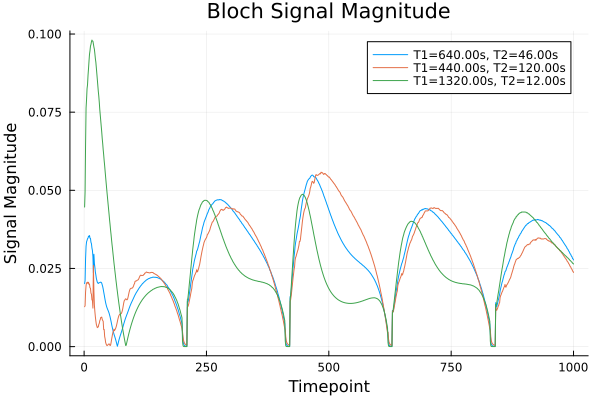

In [22]:
p = plot() 

for (T1T2, signal) in bloch_dict
    label_str = @sprintf("T1=%.2fs, T2=%.2fs", T1T2[1], T1T2[2])
    plot!(p, signal, label=label_str)
end

title!(p, "Bloch Signal Magnitude")
xlabel!(p, "Timepoint")
ylabel!(p, "Signal Magnitude")
display(p)

In [23]:
# Collect keys and signals
T1T2_keys = collect(keys(bloch_dict))
num_entries = length(T1T2_keys)
timepoints = length(first(values(bloch_dict)))

# Allocate matrix and index table
bloch_matrix = zeros(Float64, timepoints, num_entries)
idx_bloch = zeros(Float64, num_entries, 2)

# Fill them
for (j, key) in enumerate(T1T2_keys)
    bloch_matrix[:, j] = bloch_dict[key]
    idx_bloch[j, :] .= key # key = (T1_ms, T2_ms)
end

# Save to .mat file
matwrite("bloch_dict.mat", Dict("dict0" => bloch_matrix, "idx" => idx_bloch))


EPG Dict

In [ ]:
epg_dict = Dict{Tuple{Int, Int}, Vector{Float64}}()

for (T1, T2) in sampled_pairs_ms
    i = findfirst(j -> idx[j, 1] == T1 && idx[j, 2] == T2, 1:size(idx, 1))

    signal = abs.(dict_epg[:, i])
    signal ./= norm(signal)

    epg_dict[(T1, T2)] = signal
end

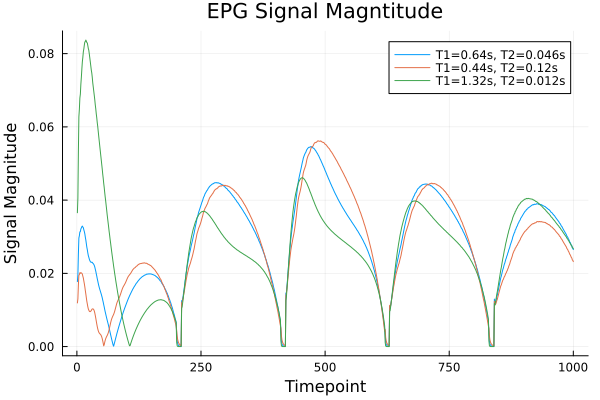

In [25]:
p = plot()

for key in keys(epg_dict)
    signal = epg_dict[key]
    plot!(p, abs.(signal), label="T1=$(round(key[1], digits=1)/1000)s, T2=$(round(key[2], digits=1)/1000)s")
end

title!(p, "EPG Signal Magntitude")
xlabel!(p, "Timepoint")
ylabel!(p, "Signal Magnitude")

display(p)


In [ ]:
for (key, bloch_signal) in bloch_dict
    if !haskey(epg_dict, key)
        println("No match in EPG dictionary for key $key")
        continue
    end

    epg_signal = epg_dict[key]

    min_len = min(length(bloch_signal), length(epg_signal))
    bloch_signal = bloch_signal[1:min_len]
    epg_signal = epg_signal[1:min_len]

    bloch_signal ./= norm(bloch_signal)
    epg_signal ./= norm(epg_signal)

    similarity = dot(bloch_signal, epg_signal)
    println("Key $key, Cosine similarity: $similarity")
end


Key (640, 46), Cosine similarity: 0.9972240080710373
Key (440, 120), Cosine similarity: 0.9995667435568456
Key (1320, 12), Cosine similarity: 0.9743805024585604


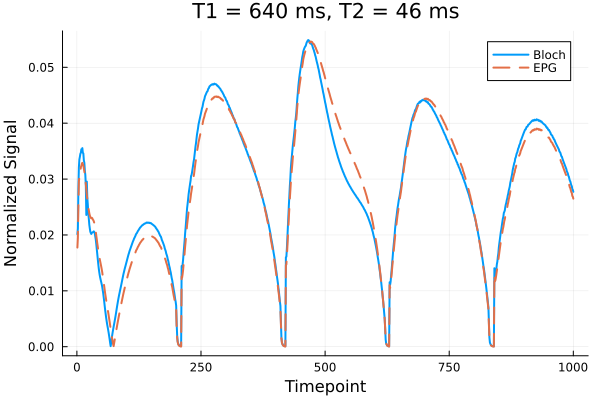

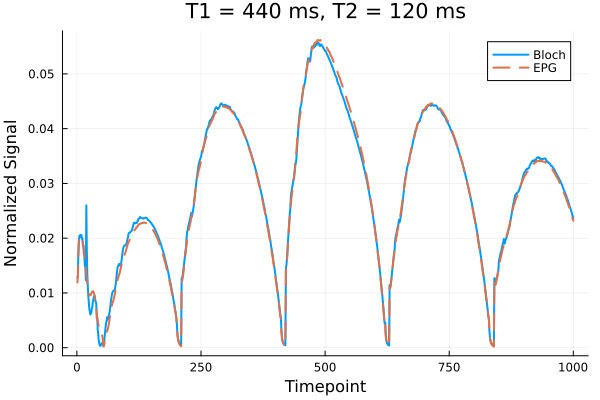

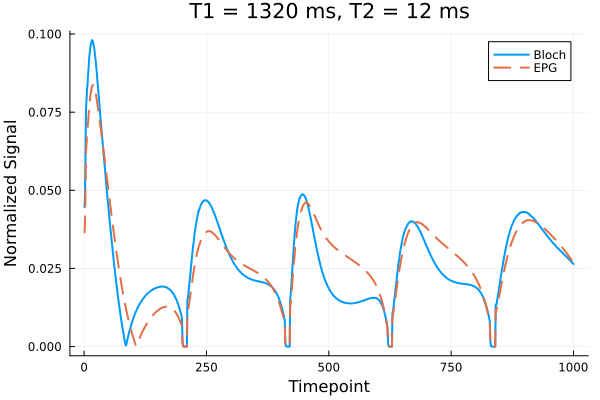

In [ ]:
for (key, bloch_signal) in bloch_dict
    if !haskey(epg_dict, key)
        println("No EPG match for $key")
        continue
    end

    epg_signal = epg_dict[key]

    min_len = min(length(bloch_signal), length(epg_signal))
    b = bloch_signal[1:min_len] ./ norm(bloch_signal[1:min_len])
    e = epg_signal[1:min_len] ./ norm(epg_signal[1:min_len])

    p = plot(b, label="Bloch", title="T1 = $(key[1]) ms, T2 = $(key[2]) ms",
             xlabel="Timepoint", ylabel="Normalized Signal", linewidth=2)
    plot!(p, e, label="EPG", linestyle=:dash, linewidth=2)
    
    display(p)
end
